**Group #27's Project Proposal for DSCI 100 Sect.002**

Ella Woolcott, Nylah Grewal, Anoushka Gautam, Loveleen Chandi

**Predicting Diagnosis of Heart Disease Based on Physical Indicator Variables**

**Introduction:**
Heart disease is a general term used to describe multiple medical conditions relating to the heart. Analyzing data relating to heart disease can have broad applications in public health and medicine, as heart disease is a leading cause of death. Symptoms of heart disease include chest pains, heart palpitations, and clogged blood vessels. Risk factors include high blood pressure and cholesterol. These variables are observed in the data set…upon wrangling the data, we may observe relationships between the patient’s symptoms and outcome/diagnosis.

The predictive question we are going to answer is:
What variables give the most reliable and accurate predictor outcome? 

The heart disease data set we have chosen to analyze comes from a machine learning repository and contains 4 databases from Cleveland, Long Beach, Hungary, and Switzerland. The dataset contains a lot of medical terminology, as shown in the table of 14 variables. The possible observations for each variable in the data set are categorical, integer, or numerical values.


| Atrribute Number | Varible | Observations Possible | Definition | 
|  :----: |    :----:   |  :----:  |  :----:  |
| 1     | age       | numerical value  | number in years |
| 2   | sex        | 1 = male; 0 = female      |self-explanatory      |
| 3   | cp | Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic     |chest pain type |
| 4   | trestbps        | in mm Hg on admission to the hospital     |resting blood pressure  |
| 5   | chol        |  in mg/dl     |serum cholesterol       |
| 6   | fbs        | TRUE = presence of diabetes (or blood sugar of >120mg/dl) and FALSE = absence of diabetes (or blood sugar of <120mg/dl)    |fasting blood sugar > 120 mg/dl      |
| 7   | restecg        |Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria      |resting electrocardiographic results    |
| 8   | thalach        | numerical value      |maximum heart rate achieved   |
| 9   | exang        | (1 = yes; 0 = no)      |exercise induced angina      |
| 10   | oldpeak        | numerical value     |ST depression induced by exercise relative to rest      |
| 11  | slope        | Value 1: upsloping, Value 2: flat, Value 3: downsloping      |the slope of the peak exercise ST segment     |
| 12   | ca        | 0-3      |number of major vessels colored by fluoroscopy     |
| 13   | thal        |3 = normal; 6 = fixed defect; 7 = reversible defect       |A blood disorder called thalassemia      |
| 14  | num        | Value 0: < 50% diameter, Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels), meaning 0 = absence of heart disease while 1 = presence of heart disease      |diagnosis of heart disease (angiographic disease status)      |

**Methods and Results**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(leaps)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# Step 1: Demonstrate that the dataset can be read from the web into R
heart_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE)
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [3]:
#STEP 2
# Clean and wrangle your data into a tidy format
# Step 2: Clean and wrangle your data into a tidy format
colnames(heart_data) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_slope", "num_major_vessels", "thalassemia", "diagnosis")
heart_data_clean <- heart_data[heart_data$diagnosis != 0, c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_slope", "thalassemia", "diagnosis")]
heart_data_clean <- na.omit(heart_data_clean)
heart_data_clean



,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
2,67,1,4,160,286,0,2,108,1,2,3.0,2
3,67,1,4,120,229,0,2,129,1,2,7.0,1
7,62,0,4,140,268,0,2,160,0,3,3.0,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
300,68,1,4,144,193,1,0,141,0,2,7.0,2
301,57,1,4,130,131,0,0,115,1,2,7.0,3
302,57,0,2,130,236,0,2,174,0,2,3.0,1


In [4]:
#STEP 3
#Convert necessary columns to factors
heart_data_clean$sex <- as.factor(heart_data_clean$sex)
heart_data_clean$chest_pain <- as.factor(heart_data_clean$chest_pain)
heart_data_clean$fasting_blood_sugar <- as.factor(heart_data_clean$fasting_blood_sugar)
heart_data_clean$rest_ecg <- factor(heart_data_clean$rest_ecg, levels = c("0", "1", "2"))
heart_data_clean$exercise_induced_angina <- as.factor(heart_data_clean$exercise_induced_angina)
heart_data_clean$ST_slope <- as.factor(heart_data_clean$ST_slope)
heart_data_clean$thalassemia <- factor(heart_data_clean$thalassemia, levels = c("3", "6", "7"))

heart_data_clean

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<int>
2,67,1,4,160,286,0,2,108,1,2,NA,2
3,67,1,4,120,229,0,2,129,1,2,NA,1
7,62,0,4,140,268,0,2,160,0,3,NA,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
300,68,1,4,144,193,1,0,141,0,2,NA,2
301,57,1,4,130,131,0,0,115,1,2,NA,3
302,57,0,2,130,236,0,2,174,0,2,NA,1


In [5]:
#STEP 4
#Convert diagnosis to binary (0 or 1)
heart_data_clean$diagnosis <- as.numeric(heart_data_clean$diagnosis > 1)
heart_data_clean

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
2,67,1,4,160,286,0,2,108,1,2,NA,1
3,67,1,4,120,229,0,2,129,1,2,NA,0
7,62,0,4,140,268,0,2,160,0,3,NA,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
300,68,1,4,144,193,1,0,141,0,2,NA,1
301,57,1,4,130,131,0,0,115,1,2,NA,1
302,57,0,2,130,236,0,2,174,0,2,NA,0


In [6]:
#STEP 5
#Select relevant columns as predictor variables
predictors <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_slope")
predictors

[1] "age"                     "sex"                    
 [3] "chest_pain"              "resting_blood_pressure" 
 [5] "cholesterol"             "fasting_blood_sugar"    
 [7] "rest_ecg"                "max_heart_rate"         
 [9] "exercise_induced_angina" "ST_slope"

In [7]:
#STEP 6
#Perform feature selection using a model
model_formula <- as.formula(paste("diagnosis ~", paste(predictors, collapse = "+")))
model <- glm(model_formula, data = heart_data_clean, family = binomial)

In [8]:
#STEP 7
#Obtain feature importance
feature_importance <- abs(coef(model))
feature_importance <- feature_importance[-1] 
ranked_features <- names(feature_importance)[order(feature_importance, decreasing = TRUE)]
selected_predictors <- unique(ranked_features)[1:9]
selected_predictors

[1] "rest_ecg1"                "ST_slope3"               
[3] "chest_pain4"              "fasting_blood_sugar1"    
[5] "ST_slope2"                "chest_pain3"             
[7] "sex1"                     "chest_pain2"             
[9] "exercise_induced_angina1"

The 6 best predictors with the most important coefficents are: Rest ECG, ST Slope, Chest Pain, Fasting Blood Sugar, Sex, Exercise Induced Angina. 

Thr model we used to get feature importance looked at each class within the predictors not the predictors as a whole. So when selecting our predictors we expanded the list until we had 6 seperate catergories named as we are filtering our data for the entire predictor subset, not specific predictor classes. 

2. Find best K neighbors value and plot accuracy vs. k-value
3. Create model with best predictors and best k-value
4. Use test data with predictor model, display with table.


**Comparisons and Visualizations Within the Data Set**

In [9]:
heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = diagnosis)
heart_train <- training(heart_split)
heart_train
heart_test <- testing(heart_split)
heart_test

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
3,67,1,4,120,229,0,2,129,1,2,NA,0
10,53,1,4,140,203,1,2,155,1,3,NA,0
17,48,1,2,110,229,0,0,168,0,3,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
297,59,1,4,164,176,1,2,90,0,2,NA,1
300,68,1,4,144,193,1,0,141,0,2,NA,1
301,57,1,4,130,131,0,0,115,1,2,NA,1


,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
33,64,1,3,140,335,0,0,158,0,1,NA,0
38,57,1,4,150,276,0,2,112,1,2,NA,0
45,61,0,4,130,330,0,2,169,0,1,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
294,63,1,4,140,187,0,2,144,1,1,NA,1
295,63,0,4,124,197,0,0,136,1,2,NA,0
302,57,0,2,130,236,0,2,174,0,2,NA,0


In [10]:
#number of men and women
count_sex <- heart_train|>
    count(sex)
count_sex

sex,n
<fct>,<int>
0,19
1,85


In [11]:
#number of people diagnosed with  
count_diag <- heart_train|>
    count(diagnosis)
count_diag

diagnosis,n
<dbl>,<int>
0,41
1,63


In [12]:
count_sugar <- heart_train|>
    count(fasting_blood_sugar)
count_sugar

fasting_blood_sugar,n
<fct>,<int>
0,87
1,17


In [13]:
count_rest_ecg <- heart_train|>
    count(rest_ecg)
count_rest_ecg

rest_ecg,n
<fct>,<int>
0,42
1,2
2,60


In [14]:
count_exer <- heart_train|>
    count(exercise_induced_angina)
count_exer

exercise_induced_angina,n
<fct>,<int>
0,48
1,56


In [15]:
count_slope <- heart_train|>
    count(ST_slope)
count_slope

ST_slope,n
<fct>,<int>
1,28
2,70
3,6


In [16]:
count_thal <- heart_train|>
    count(thalassemia)
count_thal

thalassemia,n
<fct>,<int>
NA,104


In [27]:
#maximum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)
heart_max <- heart_train|>
    summarize(across(age:ST_slope, max))|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)

#minimum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)
heart_min <- heart_train|>
    summarize(across(age:ST_slope, min))|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)

ERROR: [1m[33mError[39m in [1m[1m`summarize()`:[22m
[1m[22m[33m![39m Problem while computing `..1 = across(age:ST_slope, max)`.
[1mCaused by error in [1m[1m`across()`:[22m
[1m[22m[33m![39m Problem while computing column `sex`.
[1mCaused by error in [1m[1m`Summary.factor()`:[22m
[33m![39m ‘max’ not meaningful for factors


In [28]:
#combining minimum and maximum rows for easier comparison. Upper row is minimum values and lower row is maximum values
heart_minmax <- bind_rows(heart_min, heart_max)
heart_minmax

ERROR: Error in list2(...): object 'heart_min' not found


In [29]:
#averages and standard deviations of continous or discrete variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)

heart_mean <- heart_train|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)|>
    summarize(across(age:ST_depression, mean))
heart_mean

heart_sd<- heart_train|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)|>
    summarize(across(age:ST_depression, sd))
heart_sd

ERROR: [1m[33mError[39m in [1m[1m`select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `ST_depression` doesn't exist.


In [30]:
#binding all summary statistics for continous and discrete variables into one table for easier comparison.
#From top to bottom row: minimum value, maximum value, average, standard deviation
heart_summary <- bind_rows(heart_min, heart_max, heart_mean, heart_sd)
heart_summary

ERROR: Error in list2(...): object 'heart_min' not found


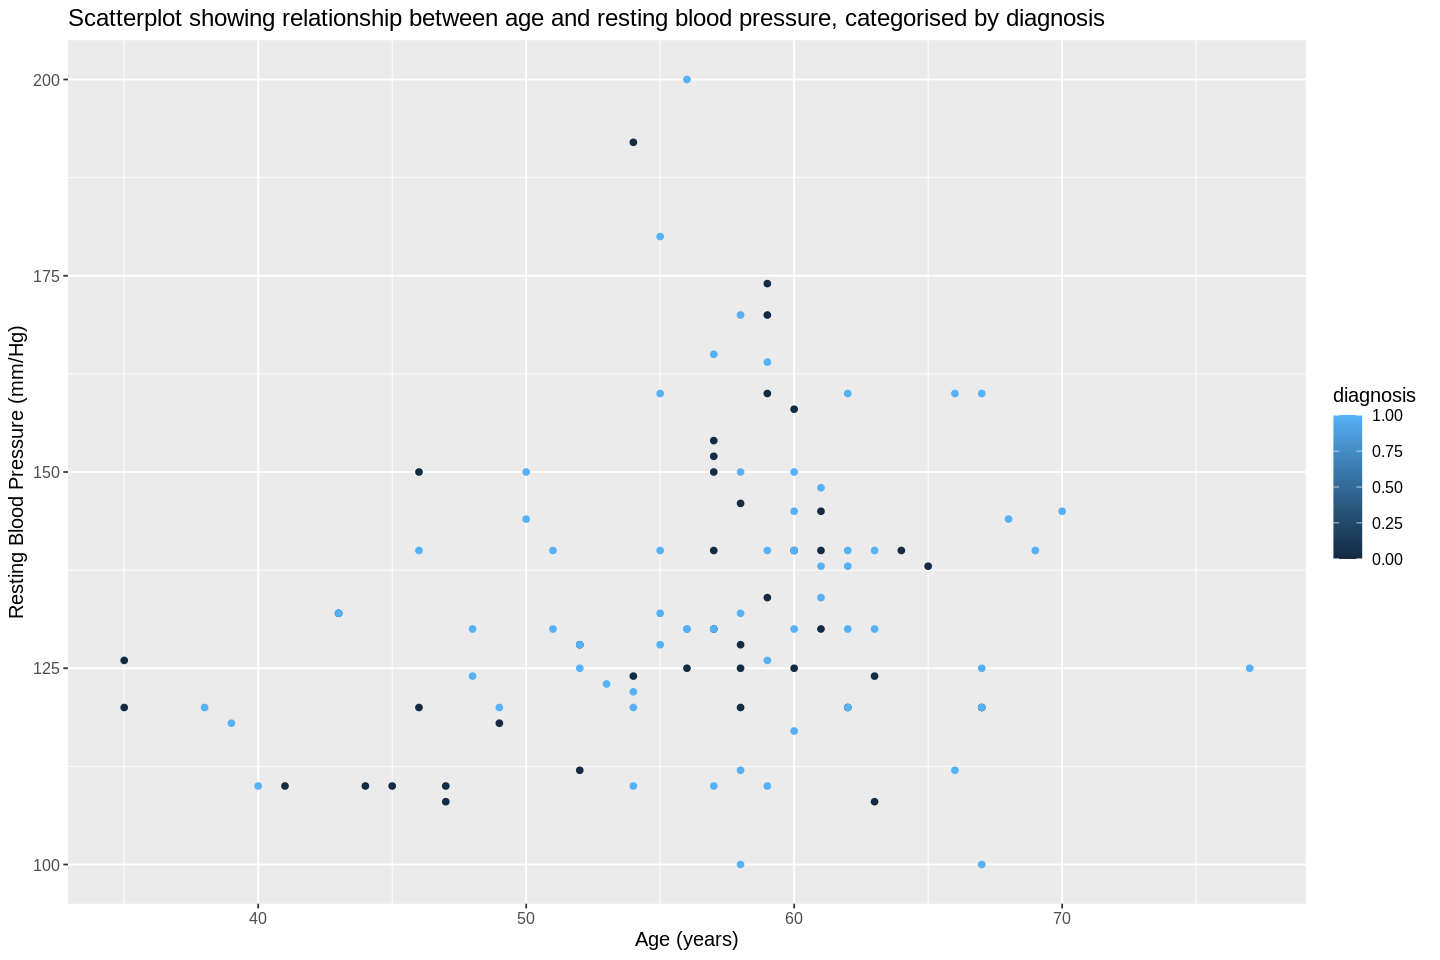

In [31]:
#Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do

#scattor plot showing elationship between age and resting blood pressure, categorised by target.
options(repr.plot.width = 12, repr.plot.height = 8) 
age_resting_point <- heart_train |>
    ggplot(aes(x = age, y = resting_blood_pressure))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (mm/Hg)")+
    ggtitle("Scatterplot showing relationship between age and resting blood pressure, categorised by diagnosis")+
    theme(text = element_text(size = 12))
age_resting_point

#0 = negative diagnosis. 1 = positive diagnosis.

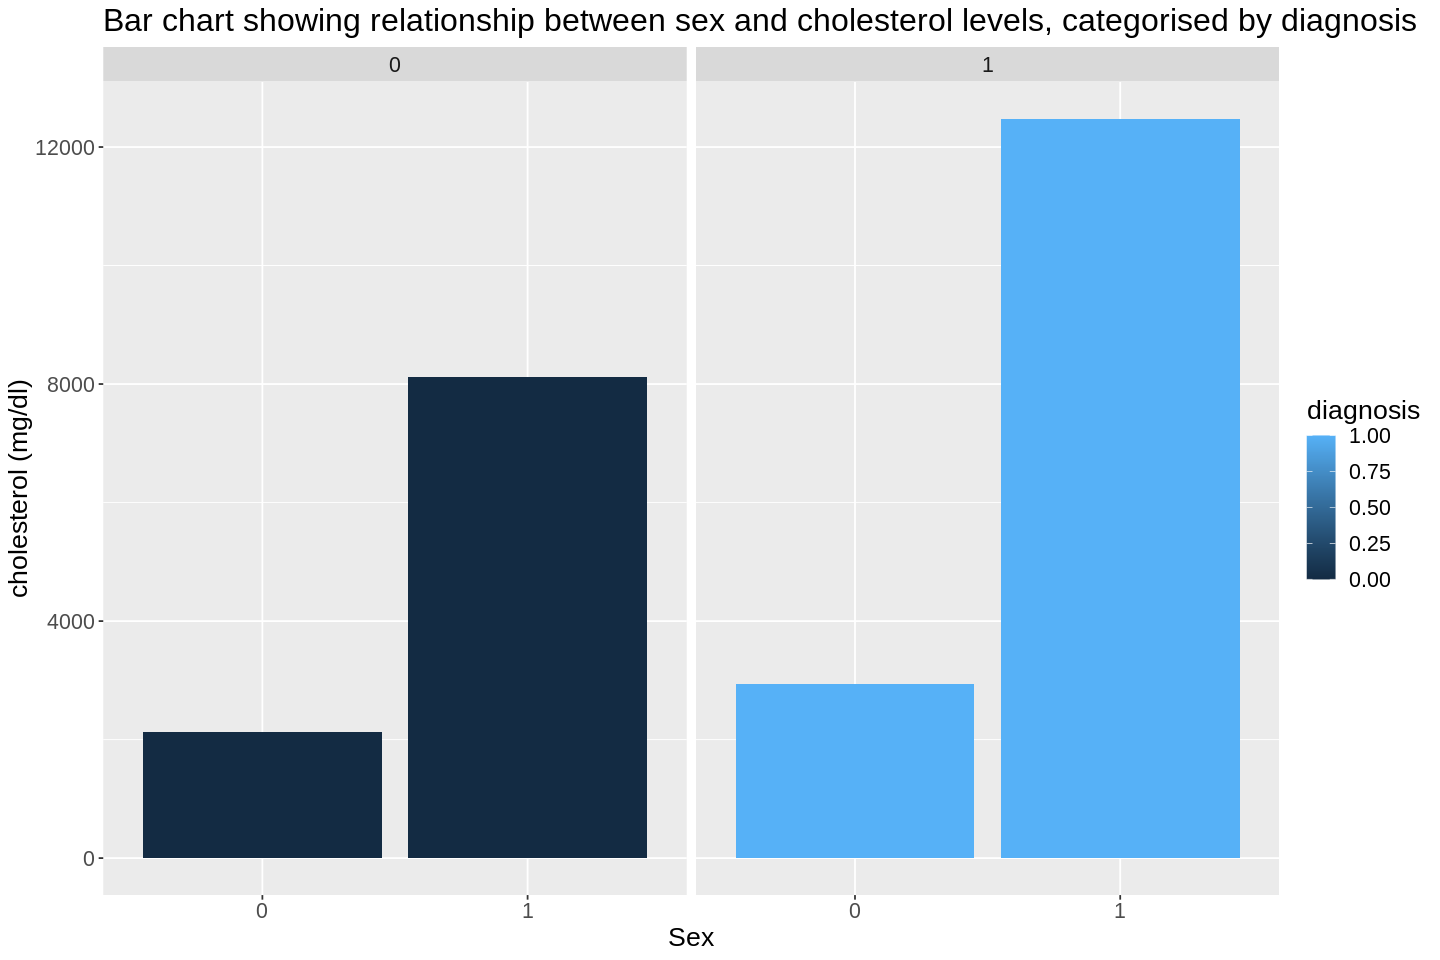

In [32]:
#bar chart showing the relations between sex and cholestrol, categorised by target
options(repr.plot.width = 12, repr.plot.height = 8) 
sex_chol_bar <- heart_train |>
    ggplot(aes(x = sex, y = cholesterol, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Sex", y = "cholesterol (mg/dl)")+
    ggtitle("Bar chart showing relationship between sex and cholesterol levels, categorised by diagnosis")+
    theme(text = element_text(size = 16))
sex_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

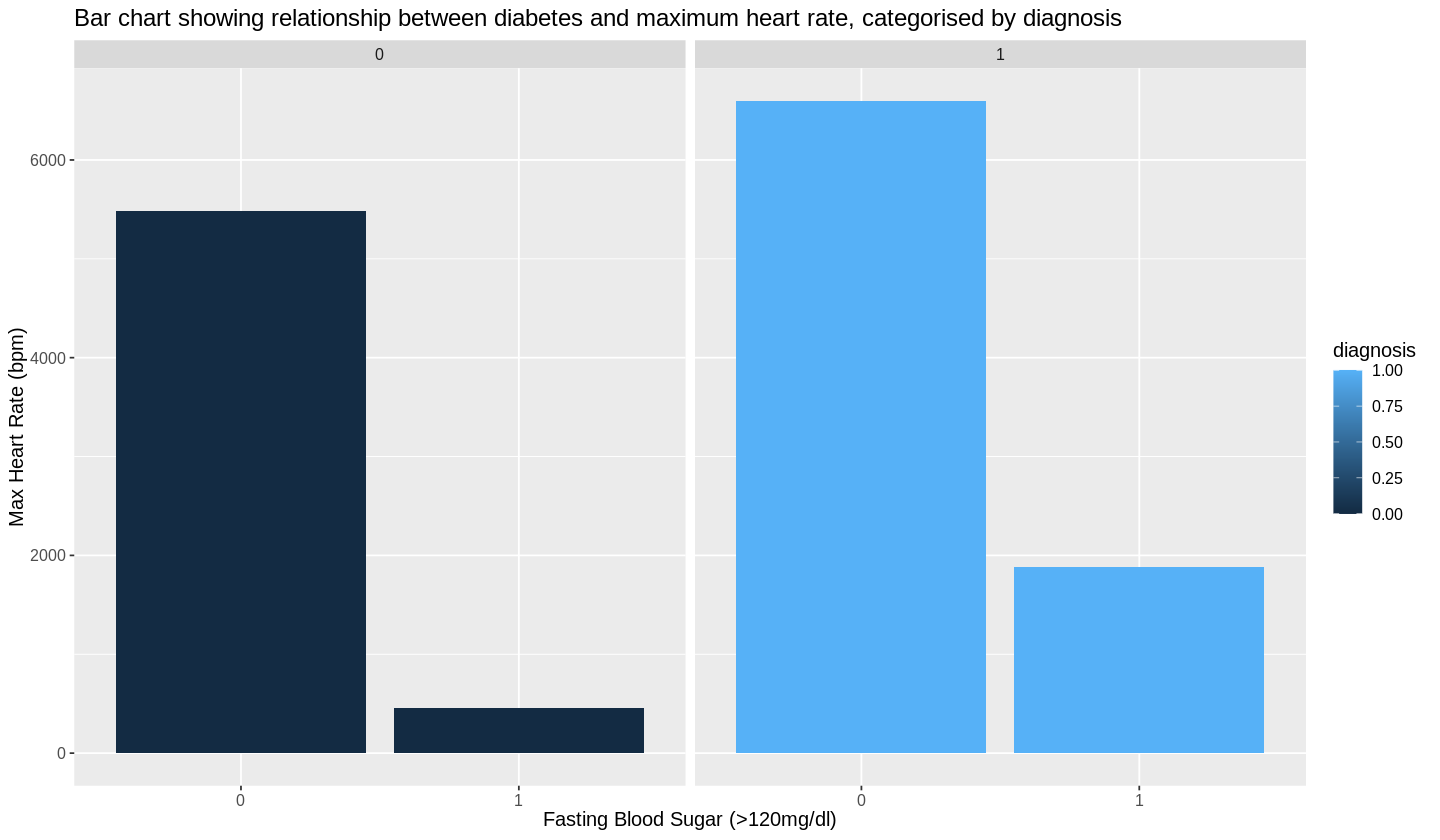

In [33]:
options(repr.plot.width = 12, repr.plot.height = 7) 
sugar_heart_bar <- heart_train |>
    ggplot(aes(x = fasting_blood_sugar, y = max_heart_rate, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Fasting Blood Sugar (>120mg/dl)", y = "Max Heart Rate (bpm)")+
    ggtitle("Bar chart showing relationship between diabetes and maximum heart rate, categorised by diagnosis")+
    theme(text = element_text(size = 12))
sugar_heart_bar

#0 = negative diagnosis. 1 = positive diagnosis.
#False = absence diabetes. True = presence of diabetes

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'ST_depression' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output

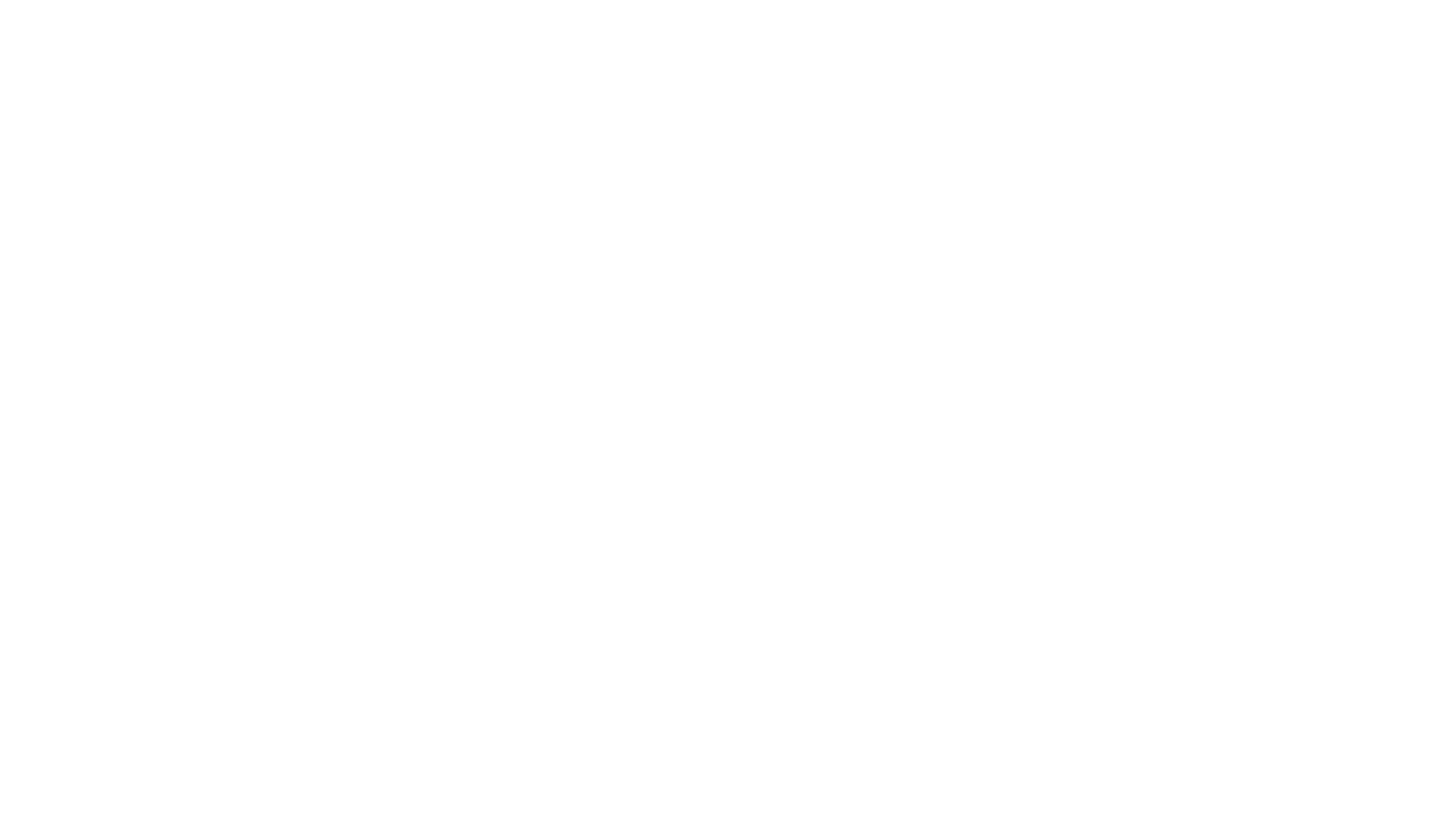

In [34]:
options(repr.plot.width = 12, repr.plot.height = 7) 
depression_hist <- heart_train |>
    ggplot(aes(x = ST_depression, fill = diagnosis))+
    facet_grid(rows = vars(diagnosis))+
    geom_histogram(alpha = 0.5, position = "identity")+
    labs(x = "Depression after execerise (mm)")+
    ggtitle("histogram showing distribution of ST depression, categorised by diagnosis")+
    theme(text = element_text(size = 20))
depression_hist

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



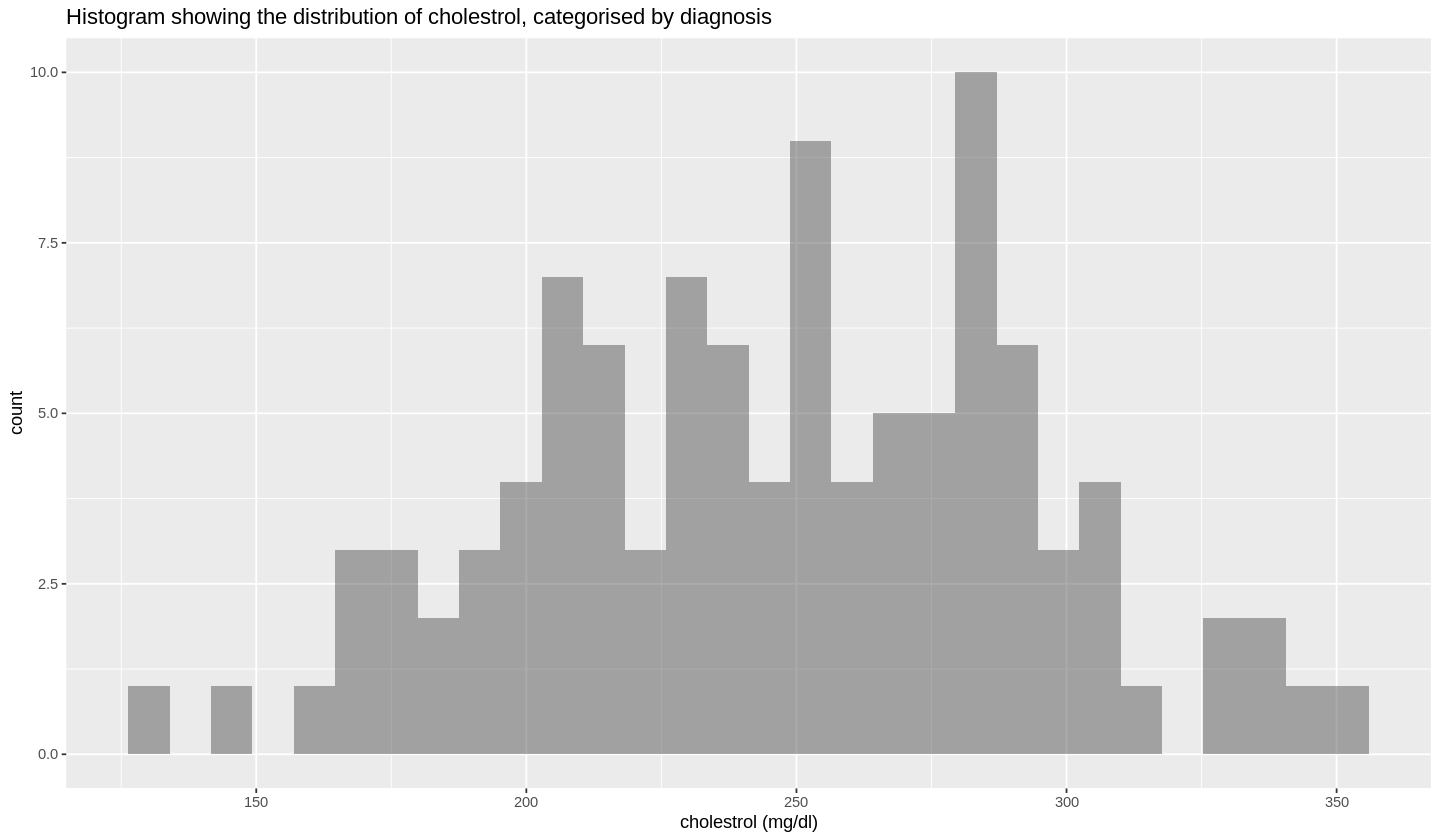

In [35]:
options(repr.plot.width = 12, repr.plot.height = 7) 
slope_hist <- heart_train |>
    ggplot(aes(x = cholesterol, fill = diagnosis))+
    geom_histogram(alpha = 0.5, position = "identity")+
    labs(x = "cholestrol (mg/dl)")+
    ggtitle("Histogram showing the distribution of cholestrol, categorised by diagnosis")
    theme(text = element_text(size = 20))
slope_hist

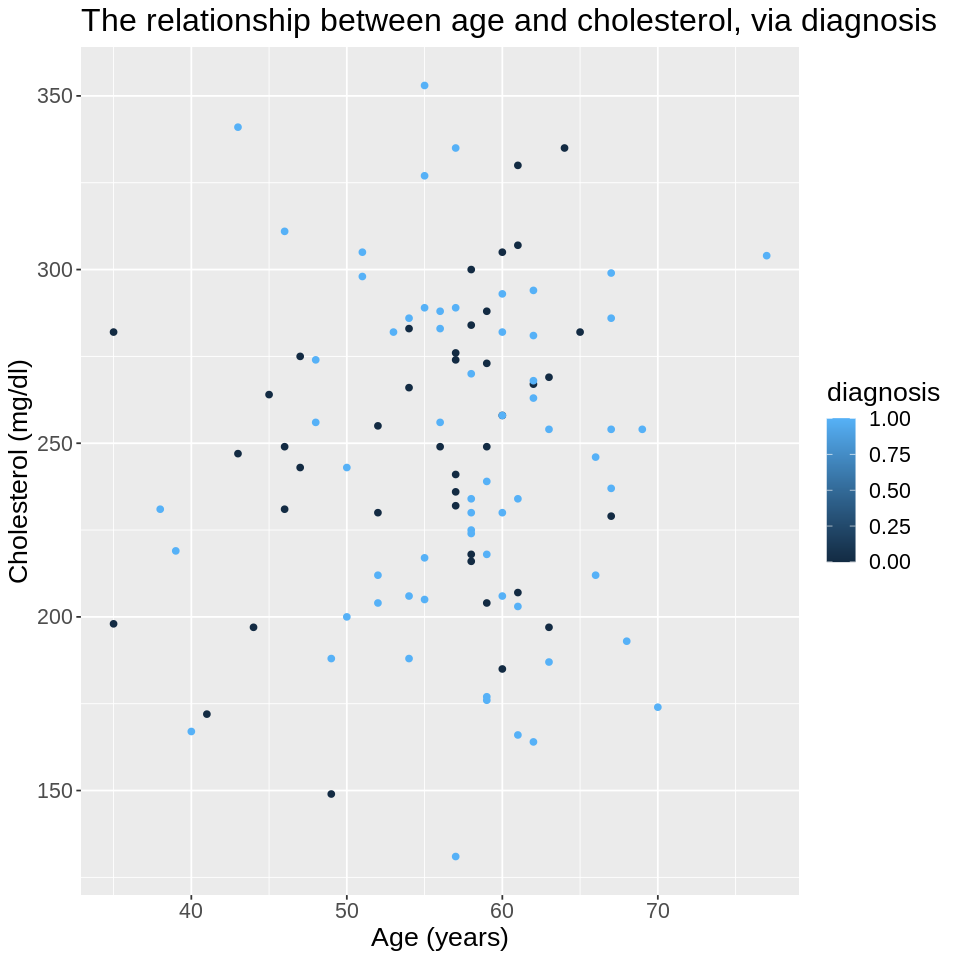

In [36]:
#scattor plot showing relationship between age and cholesterol, categorised by target.
options(repr.plot.width = 8, repr.plot.height = 8) 
age_chol_point <- heart_train |>
    ggplot(aes(x = age, y = cholesterol))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Cholesterol (mg/dl)")+
    ggtitle("The relationship between age and cholesterol, via diagnosis")+
    theme(text = element_text(size = 16))
age_chol_point

#0 = negative diagnosis. 1 = positive diagnosis.

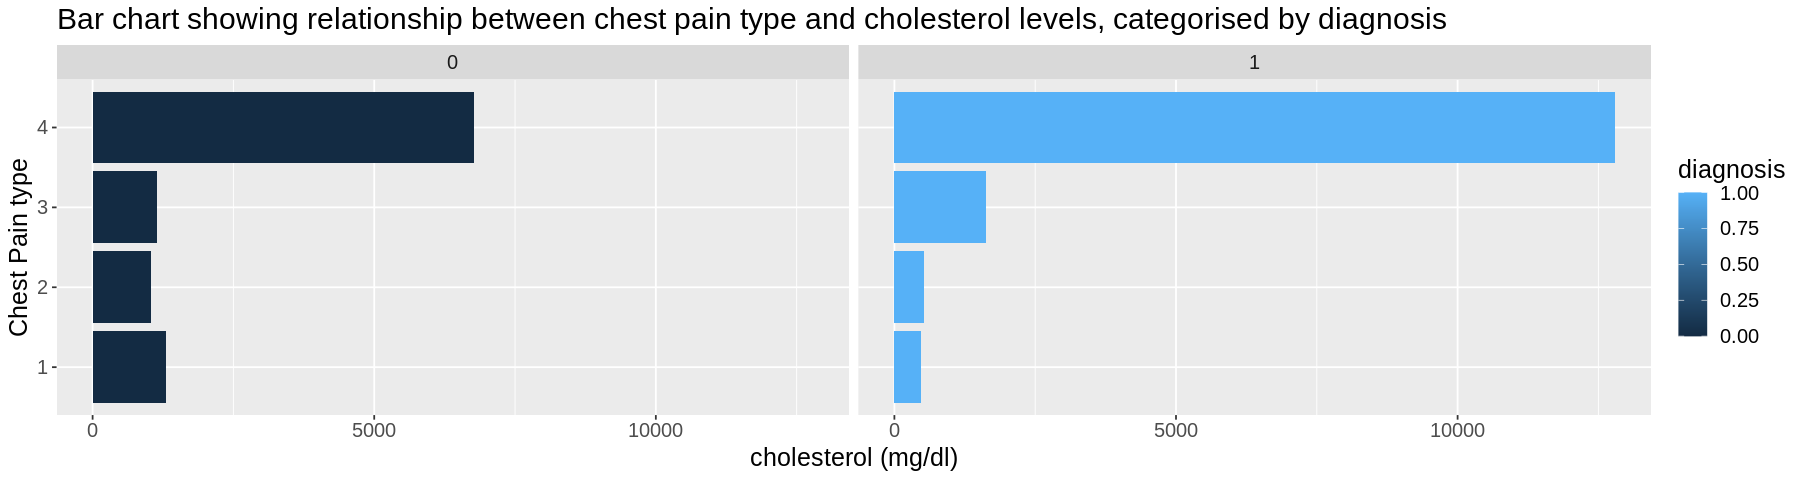

In [37]:
#bar chart showing relationship between chest pain type and cholesterol, categorised by diagnosis
options(repr.plot.width = 15, repr.plot.height = 4) 
chest_chol_bar <- heart_train |>
    ggplot(aes(x = chest_pain, y = cholesterol, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Chest Pain type", y = "cholesterol (mg/dl)")+
    ggtitle("Bar chart showing relationship between chest pain type and cholesterol levels, categorised by diagnosis")+
    theme(text = element_text(size = 15))

chest_chol_bar <- chest_chol_bar+coord_flip()
chest_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

**Discussion**

summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?


**References** 

At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
Make sure to cite the source of your data as well.


.

In [10]:
heart_data_c <- heart_train |> 
    select("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_slope", "diagnosis")
heart_data_c
lm1 <- lm(heart_data_c,formula=diagnosis ~.)
summary(lm1)

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,diagnosis
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
3,67,1,4,120,229,0,2,129,1,2,0
10,53,1,4,140,203,1,2,155,1,3,0
17,48,1,2,110,229,0,0,168,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
297,59,1,4,164,176,1,2,90,0,2,1
300,68,1,4,144,193,1,0,141,0,2,1
301,57,1,4,130,131,0,0,115,1,2,1



Call:
lm(formula = diagnosis ~ ., data = heart_data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8588 -0.4526  0.1850  0.3603  0.8963 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)  
(Intercept)               1.495e-03  7.935e-01   0.002   0.9985  
age                       9.450e-03  6.422e-03   1.472   0.1447  
sex1                      1.028e-02  1.435e-01   0.072   0.9430  
chest_pain2               1.329e-01  2.659e-01   0.500   0.6185  
chest_pain3               1.592e-01  2.350e-01   0.677   0.5000  
chest_pain4               3.115e-01  2.098e-01   1.485   0.1411  
resting_blood_pressure   -1.657e-03  2.719e-03  -0.609   0.5438  
cholesterol               6.263e-05  1.064e-03   0.059   0.9532  
fasting_blood_sugar1      2.393e-01  1.437e-01   1.666   0.0993 .
rest_ecg1                 3.697e-01  3.049e-01   1.212   0.2285  
rest_ecg2                 2.499e-02  1.040e-01   0.240   0.8107  
max_heart_rate           -1.212e-03  2.449e

In [13]:
Best_Subset <-
    regsubsets(diagnosis~.,
               data =heart_data_c,
               nbest = 1,      # 1 best model for each number of predictors
               nvmax = NULL,    # NULL for no limit on number of variables
               force.in = NULL, force.out = NULL,
               method = "exhaustive")

summary_best_subset <- summary(Best_Subset)
as.data.frame(summary_best_subset$outmat)

,age,sex1,chest_pain2,chest_pain3,chest_pain4,resting_blood_pressure,cholesterol,fasting_blood_sugar1,rest_ecg1,rest_ecg2,max_heart_rate,exercise_induced_angina1,ST_slope2,ST_slope3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1 ( 1 ),,,,,*,,,,,,,,,
2 ( 1 ),*,,,,*,,,,,,,,,
3 ( 1 ),*,,,,*,,,*,,,,,,
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
12 ( 1 ),*,,*,*,*,*,,*,*,*,*,*,*,*
13 ( 1 ),*,*,*,*,*,*,,*,*,*,*,*,*,*
14 ( 1 ),*,*,*,*,*,*,*,*,*,*,*,*,*,*


In [14]:
which.max(summary_best_subset$adjr2)

[1] 6

In [18]:
print(summary_best_subset$which[7,])


             (Intercept)                      age                     sex1 
                    TRUE                     TRUE                    FALSE 
             chest_pain2              chest_pain3              chest_pain4 
                   FALSE                    FALSE                     TRUE 
  resting_blood_pressure              cholesterol     fasting_blood_sugar1 
                    TRUE                    FALSE                     TRUE 
               rest_ecg1                rest_ecg2           max_heart_rate 
                    TRUE                    FALSE                    FALSE 
exercise_induced_angina1                ST_slope2                ST_slope3 
                   FALSE                     TRUE                     TRUE 


In [17]:
Top 6: Age,chest pain, fasting blood sugar, ST_slope, rest_ecg, resting blood sugar 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected ','
1: Age,
       ^
